# Breast Cancer Dataset
## Task Overview
In this lab activity, your task is to build a Logistic Regression model using a subset of data points from the Breast Cancer data. The following are the specific sub-tasks you must accomplish:

1. **Load the Data** 
- Load the Breast Cancer data in your Jupyter Notebook from the scikit-learn library.
2. **Select a Unique Randomization Seed** 
- Select a unique integer that will serve as the seed for your randomization.
3. **Sample Train Data** 
- Randomly sample a subset of the data using the seed you have selected; limit the sample to 30. Ensure that your sampled data is representative of the population.
4. **Weight Update Function** 
- Build a weight update function following the Gradient Descent concept.
5. **Display the Values of Weights** 
- Print the values of weights at each iteration separated by individual cell.
6. **Plot the Value of Weights** 
- Display a line chart showing the variation of weight values per iteration. Per each weight, show an individual line chart of values against iteration.
7. **Build a Function for the Final Regression Model** 
- Create a function using the final regression model after all your iterations. Display the mathematical expression with all the final weights values multiplied by the input variables.
8. **Sample Test Data** 
- From the remainder of the original dataset, randomly sample another set of 30 observations NOT present in your training sample.
9. **Use the Regression Function for Prediction** 
- Use your built linear regression function to predict for the Target Variable in your test set.
10. **Calculate for Errors** 
- Calculate for the overall error between your model’s prediction and the actual values in the test set.

The final deliverable will include your code implementation divided into sections according to above subtasks.

The description of the features can also be seen on the library.

## Load the Data
Load the Breast Cancer data in your Jupyter Notebook from the scikit-learn library.

In [98]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [99]:
# Check the non-null count and the data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [100]:
# Examine the basic statistical information of the dataset
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [101]:
# Display the top and bottom 5 rows of the dataset
pd.concat([X.head(), X.tail()])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Select a Unique Randomization Seed
Select a unique integer that will serve as the seed for your randomization.

In [102]:
# Set a unique integer for the randomzied seed
unique_seed = 42
np.random.seed(unique_seed)

### Sample Train Data
Randomly sample a subset of the data using the seed you have selected; limit the sample to 30. Ensure that your sampled data is representative of the population.

In [103]:
# Sample the Breast Cancer data to 30 with the unique seed as the random state
sampled_indices = np.random.choice(len(X), size=30, replace=False)
X_train = X.values[sampled_indices]
y_train = y.values[sampled_indices]

### Weight Update Function
Build a weight update function following the Gradient Descent concept.

In [104]:
# Scale the data before applying gradient descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Sigmoid activation function
def sigmoid(z):    
    return 1 / (1 + np.exp(-z))

# Implement gradient descent to find the optimal weights for logisitc regression.
def gradient_descent(X, y, learning_rate, n_iterations):
    n_samples, n_features = X.shape

    # Initialize weights and bias to zeros, and store the weights history at each iteration
    w = np.zeros(n_features)
    b = 0
    weights_history = []
    losses = []

    for i in range(n_iterations):
        # Calculate predictions using sigmoid function
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Calculate the error
        error = y_pred - y

        # Calculate the gradients
        dw = (1/n_samples) * np.dot(X.T, error)
        db = (1/n_samples) * np.sum(error)

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Store a copy of the weights
        weights_history.append(w.copy())

        # Calculate and store the loss (Binary Cross-Entropy Loss)
        loss = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
        losses.append(loss)

        # Print the loss (MSE) for monitoring convergence
        if i % 500 == 0:
            print(f"Iteration {i}: Loss = {loss}")


    return w, b, weights_history, losses

learning_rate = 0.01
n_iterations = 5000

w, b, weights_history, losses = gradient_descent(X_train_scaled, y_train, learning_rate, n_iterations)

Iteration 0: Loss = 0.693147180559945
Iteration 500: Loss = 0.10093681819413812
Iteration 1000: Loss = 0.07318186922711088
Iteration 1500: Loss = 0.05859903560105997
Iteration 2000: Loss = 0.0489058430602451
Iteration 2500: Loss = 0.04189021945147213
Iteration 3000: Loss = 0.03656674660468255
Iteration 3500: Loss = 0.03239374234882839
Iteration 4000: Loss = 0.029040493445704522
Iteration 4500: Loss = 0.026291744413080895


### Display the Values of Weights
Print the values of weights at each iteration separated by individual cell.

In [105]:
# Put in a dataframe the values of weights of each feature and print
print("Final Weights:")
weights_df = pd.DataFrame({'Feature': X.columns, 'Weight': w})
print(weights_df)

Final Weights:
                    Feature    Weight
0               mean radius -0.637866
1              mean texture -0.190821
2            mean perimeter -0.664485
3                 mean area -0.634142
4           mean smoothness -0.371169
5          mean compactness -0.411028
6            mean concavity -0.501730
7       mean concave points -0.543533
8             mean symmetry  0.548687
9    mean fractal dimension -0.039290
10             radius error -0.733592
11            texture error  0.444701
12          perimeter error -0.629333
13               area error -0.792277
14         smoothness error  0.460607
15        compactness error  0.012349
16          concavity error  0.023100
17     concave points error -0.053167
18           symmetry error  0.136864
19  fractal dimension error -0.017441
20             worst radius -0.748299
21            worst texture  0.022069
22          worst perimeter -0.770420
23               worst area -0.739021
24         worst smoothness -0.2337

### Plot the Value of Weights
Display a line chart showing the variation of weight values per iteration. Per each weight, show an individual line chart of values against iteration.

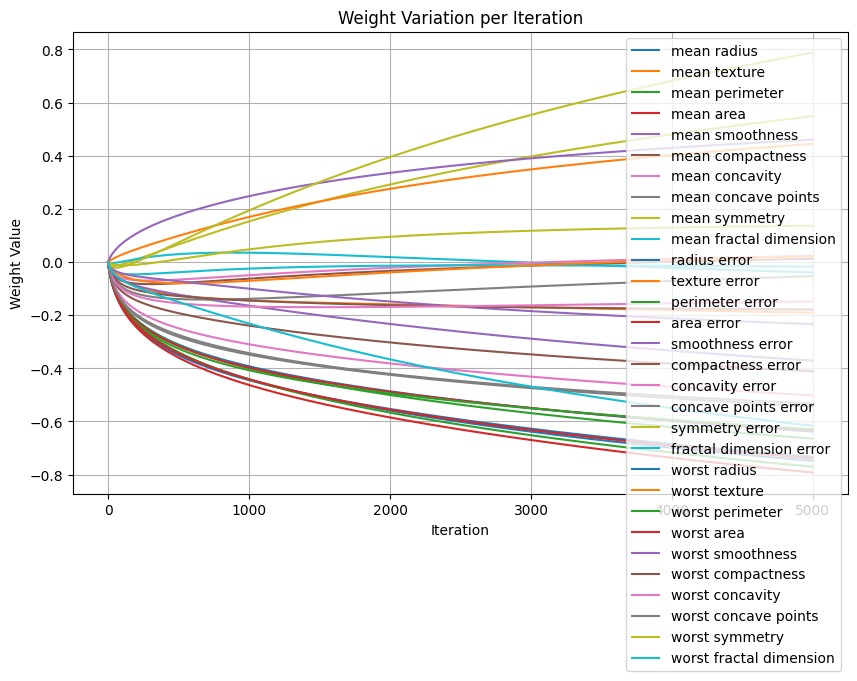

In [106]:
num_features = len(X.columns)
iterations  = range(n_iterations)

plt.figure(figsize=(10, 6))

for j in range(num_features):
    # Extract thje weight values for the j-th feature
    weight_values = [weights[j] for weights in weights_history]

    # Plots the weight values against the iteration
    plt.plot(iterations, weight_values, label=X.columns[j])

plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Weight Variation per Iteration")
plt.legend()
plt.grid(True)
plt.show()

### Build a Function for the Final Regression Model
Create a function using the final regression model after all your iterations. Display the mathematical expression with all the final weights values multiplied by the input variables.

In [107]:
def predict(X_new, w, b, scaler):
    # Scale the new data using the scaler
    X_new_scaled = scaler.transform(X_new)
    z = np.dot(X_new_scaled, w) + b

    # Get probabilities
    probabilities = sigmoid(z) 
    # Convert to class labels (0 or 1)
    y_pred = (probabilities >= 0.5).astype(int)

    return y_pred, probabilities

# Display the mathematical expression of the logistic regression model
def display_equation(w, b, feature_names):
    equation = "Probability(Malignant) = 1 / (1 +exp(-("

    for i in range(len(w)):
        weight = w[i]
        feature = feature_names[i]
        if i > 0:
            equation+= " + "
        equation += f"{weight:.4f} * {feature}"

    equation += f" + {b:.4f})))"
    print("Logistic Regression Equation:")
    print(equation)

### Sample Test Data
From the remainder of the original dataset, randomly sample another set of 30 observations NOT present in your training sample.

In [108]:
# Identify the remaining data
remaining_mask = np.ones(len(X), dtype=bool)
remaining_mask[sampled_indices] = False
X_remaining = X[remaining_mask]
y_remaining = y[remaining_mask]

# New sample from remaining data
np.random.seed(100)
new_indices = np.random.choice(len(X_remaining), size=30, replace=False)
X_test = X_remaining.values[new_indices]
y_test = y_remaining.values[new_indices]

### Use the Regression Function for Prediction
Use your built linear regression function to predict for the Target Variable in your test set.

In [109]:
# Predict on the test set
y_pred_test, probabilities = predict(X_test, w, b, scaler)
display_equation(w, b, X.columns)

Logistic Regression Equation:
Probability(Malignant) = 1 / (1 +exp(-(-0.6379 * mean radius + -0.1908 * mean texture + -0.6645 * mean perimeter + -0.6341 * mean area + -0.3712 * mean smoothness + -0.4110 * mean compactness + -0.5017 * mean concavity + -0.5435 * mean concave points + 0.5487 * mean symmetry + -0.0393 * mean fractal dimension + -0.7336 * radius error + 0.4447 * texture error + -0.6293 * perimeter error + -0.7923 * area error + 0.4606 * smoothness error + 0.0123 * compactness error + 0.0231 * concavity error + -0.0532 * concave points error + 0.1369 * symmetry error + -0.0174 * fractal dimension error + -0.7483 * worst radius + 0.0221 * worst texture + -0.7704 * worst perimeter + -0.7390 * worst area + -0.2338 * worst smoothness + -0.1787 * worst compactness + -0.1485 * worst concavity + -0.5329 * worst concave points + 0.7883 * worst symmetry + -0.6165 * worst fractal dimension + -0.0976)))


### Calculate for Errors
Calculate for the overall error between your model’s prediction and the actual values in the test set.

In [110]:
# Logistic Regression Metrics
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "F1 Score": f1_score(y_test, y_pred_test),
    "AUC Score": roc_auc_score(y_test, y_pred_test),
}

print("Logistic Regression Metrics:")
for metric, value in logistic_metrics.items():
    print(f"{metric}: {value:.2f}")
print(f"Confusion Matrix:\n%s" % confusion_matrix(y_test, y_pred_test))

Logistic Regression Metrics:
Accuracy: 0.93
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
AUC Score: 0.93
Confusion Matrix:
[[12  1]
 [ 1 16]]
